<a href="https://colab.research.google.com/github/Feymankamal/Chromaticity-1931/blob/main/colour_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we plot the CIE 1913 chromaticity diagram with **colour module**

In [ ]:
!pip list | grep colour

colour                             0.1.5


Sometimes the environment variable is not set properly so if it gives errors like  **colour is not a module** please *restart the session* and run this cell of code

In [ ]:
%env COLOUR_SCIENCE__COLOUR__IMPORT_VAAB_COLOUR=true
!pip install -q colour-science

!python -c "import imageio;imageio.plugins.freeimage.download()"

!mkdir -p /content/downloads

# Uncomment the following lines for the latest develop  branch content.
!pip uninstall -y colour-science
!if ! [ -d "colour" ]; then git clone https://github.com/colour-science/colour; fi
!if [ -d "colour" ]; then cd colour && git fetch && git checkout develop && git pull && cd ..; fi

import sys
sys.path.insert(0, 'colour')

env: COLOUR_SCIENCE__COLOUR__IMPORT_VAAB_COLOUR=true
Found existing installation: colour-science 0.4.6
Uninstalling colour-science-0.4.6:
  Successfully uninstalled colour-science-0.4.6
Already on 'develop'
Your branch is up to date with 'origin/develop'.
Already up to date.


The code below is check wheather the environment variable is set properly.

In [ ]:
import colour

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]           *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : v0.4.5-15-g9d743142e                                         *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.35.1                                                      *
*       matplotlib : 3.7.1                                                    *
*       networkx : 3.3                                                        *
*       numpy : 1.26.4                                                        *
*       pandas : 2.2.2                  

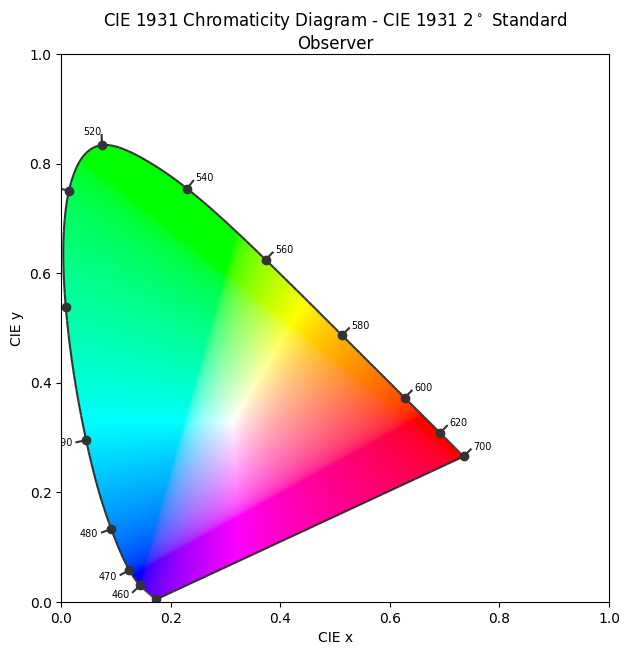

(<Figure size 640x640 with 1 Axes>,
 <Axes: title={'center': 'CIE 1931 Chromaticity Diagram - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='CIE x', ylabel='CIE y'>)

In [ ]:
from colour.plotting import plot_chromaticity_diagram_CIE1931
plot_chromaticity_diagram_CIE1931()

For plotting points in the chromaticity diagram

/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


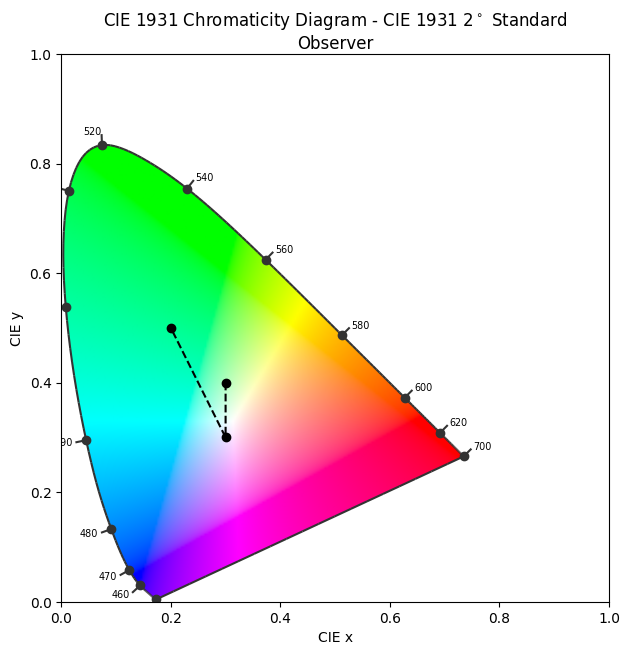

In [ ]:
import colour
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot([0.3, 0.3,0.2],[0.4,0.3,0.5],'ko--')

Now we want to calculate the X,Y and Z values by the following formulae

$X(\lambda)=\int_{400} ^{700} R(\lambda)x(\lambda) d\lambda$

$Y(\lambda)=\int_{400} ^{700} R(\lambda)y(\lambda) d\lambda$

$Z(\lambda)=\int_{400} ^{700} R(\lambda)z(\lambda) d\lambda$

from this the points **x,y** are calculated as follows

$x=\frac{X}{X+Y+Z}$

$y=\frac{Y}{X+Y+Z}$


In [ ]:
from scipy import interpolate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Now we will read the necessary data files

* cie colour matching function
* experimental data

In [ ]:
%cd /content/sample_data/

/content/sample_data


In [ ]:
cie=pd.read_excel('CIE_xyz_1931_2deg.xlsx')

In [ ]:
cie

,wave_length,x,y,z
0,360,0.000130,3.917000e-06,0.000606
1,361,0.000146,4.393581e-06,0.000681
2,362,0.000164,4.929604e-06,0.000765
3,363,0.000184,5.532136e-06,0.000860
4,364,0.000207,6.208245e-06,0.000967
...,...,...,...,...
466,826,0.000002,5.980895e-07,0.000000
467,827,0.000002,5.575746e-07,0.000000
468,828,0.000001,5.198080e-07,0.000000
469,829,0.000001,4.846123e-07,0.000000


We **plot** the data to verify it

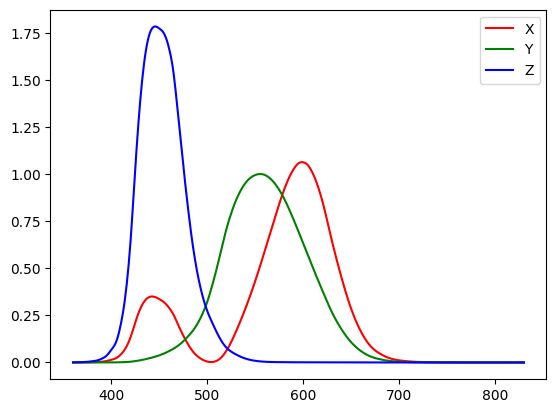

In [ ]:
plt.plot(cie.wave_length,cie.x,'r-',label='X')
plt.plot(cie.wave_length,cie.y,'g-',label='Y')
plt.plot(cie.wave_length,cie.z,'b-',label='Z')
plt.legend(loc='upper right')

In [ ]:
help(interpolate.interp1d)

Help on class interp1d in module scipy.interpolate._interpolate:

class interp1d(scipy.interpolate._polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  .. legacy:: class
 |  
 |      For a guide to the intended replacements for `interp1d` see
 |      :ref:`tutorial-interpolate_1Dsection`.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``. This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Parameters
 |  ----------
 |  x : (npoints, ) array_like
 |      A 1-D array of real values.
 |  y : (..., npoints, ...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`. Use the ``axis`` parameter
 |      to select correct axis. Unlike other interpolators, the default
 |      inter

In [ ]:
exp=pd.read_excel('25deg_ref.xlsx')

In [ ]:
exp

,Wavelength,Ptrn_700nm,Ptrn_600nm,Ptrn_400nm,Ptrn_300nm,Ptrn_500nm
0,177.034,58.784723,73.715278,77.152778,44.409724,68.020833
1,177.635,238.148159,113.148159,246.666633,253.888872,194.814809
2,178.237,118.550724,243.043477,78.260870,76.376807,72.173906
3,178.838,1113.749981,1352.083349,980.416679,954.583359,1285.833359
4,179.440,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
1607,1098.293,56.075275,33.655917,45.591391,36.827949,14.569904
1608,1098.832,972.222392,745.555623,144.444275,784.444682,361.110942
1609,1099.370,4.594597,-8.873872,-13.783780,22.342342,32.972975
1610,1099.908,51.611099,34.333344,66.333338,45.777766,47.444433


Now we interpolate experimental data in a selected range of wavelength $\lambda=400nm-700nm$ for the 700nm pattern

In [ ]:
f_700=interpolate.interp1d(exp.Wavelength,exp.Ptrn_700nm)

In [ ]:
wvl=np.arange(400,701,1)

In [ ]:
wvl

array([400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412,
       413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425,
       426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438,
       439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451,
       452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464,
       465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477,
       478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490,
       491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503,
       504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516,
       517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529,
       530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542,
       543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555,
       556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568,
       569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 58

In [ ]:
y_700=f_700(wvl)
print(y_700)

[   58.70074858   -48.8587748    105.41403828   103.61053021   201.95223771
   106.02703592   157.91893115   135.25399461   172.30503079   127.15310486
   154.27528666   134.85721852   163.92709944   170.46852058   157.38930888
   184.53857845   172.27819472   214.37750479   201.1315303    179.36098952
   150.88497239   132.90946584   122.93645832   107.07346028    97.32267057
    87.86463266    72.02654402    68.23912532    64.36137914    60.2674397
    54.45280478    48.68245387    44.14674       39.18292205    35.74928093
    35.30849       36.76259814    40.64252083    43.67561748    46.62305538
    50.99707426    56.31799444    62.93145884    72.54036189    82.76898055
    93.33815016    98.8711098    101.37105433   105.49262799   101.73564283
   107.81588727   123.28545922   172.19560685   236.44058893   302.75038264
   365.33978934   414.88470512   473.99882095   563.58342831   683.62649303
   794.21565195   912.5600106    957.99277908   978.54872904  1060.77650274
  1130.542230

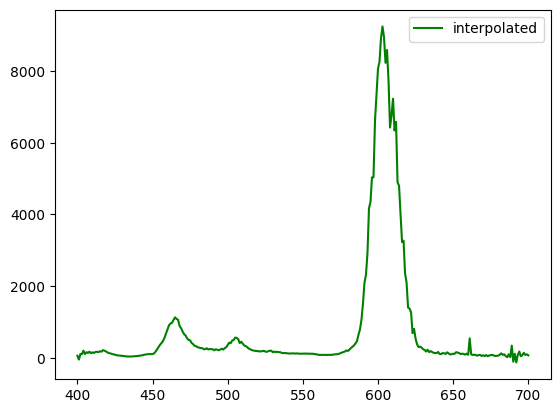

In [ ]:
plt.plot(wvl,y_700,'g-',label='interpolated')
plt.legend(loc='upper right')

Here is the **experimental** plot shown below

(400.0, 700.0)

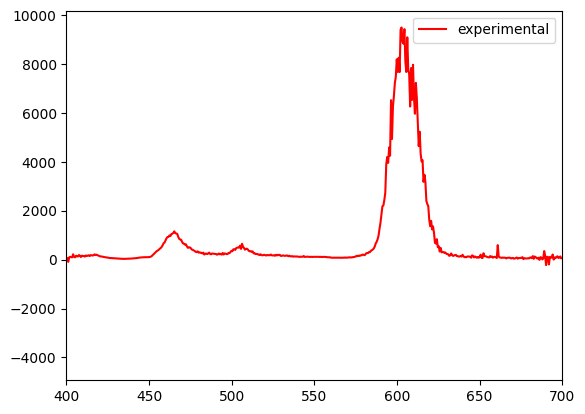

In [ ]:
plt.plot(exp.Wavelength,exp.Ptrn_700nm,'r-',label='experimental')
plt.legend(loc='upper right')
plt.xlim(400,700)

now plot the two functions $R(\lambda)$ as **black** and x of CIE colour matching function as **green** for comparison

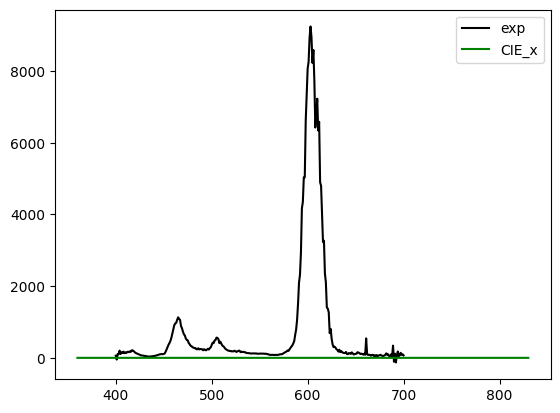

In [ ]:
plt.plot(wvl,y_700,'k-',label='exp')
plt.plot(cie.wave_length,cie.x,'g-',label='CIE_x')
plt.legend(loc='upper right')

Now do the same thing for other patterns

In [ ]:
f_600=interpolate.interp1d(exp.Wavelength,exp.Ptrn_600nm)
y_600=f_600(wvl)
f_500=interpolate.interp1d(exp.Wavelength,exp.Ptrn_500nm)
y_500=f_500(wvl)
f_400=interpolate.interp1d(exp.Wavelength,exp.Ptrn_400nm)
y_400=f_400(wvl)
f_300=interpolate.interp1d(exp.Wavelength,exp.Ptrn_300nm)
y_300=f_300(wvl)

Now we do the integration using **trapezoidal rule** to find **X**, **Y**, **Z**

In [ ]:
print(cie.x[40])
print(cie.x[340])

0.01431
0.01135916


In [ ]:
print(cie.x[40:341])

40     0.014310
41     0.015704
42     0.017147
43     0.018781
44     0.020748
         ...   
336    0.014791
337    0.013831
338    0.012949
339    0.012129
340    0.011359
Name: x, Length: 301, dtype: float64


In [ ]:
x_ch=np.trapz(y_700*cie.x[40:341],wvl)
print(x_ch)

192584.202276


In [ ]:
y_ch=np.trapz(y_700*cie.y[40:341],wvl)
print(y_ch)

115995.042443


In [ ]:
z_ch=np.trapz(y_700*cie.z[40:341],wvl)
print(z_ch)

34317.879114


In [ ]:
x=x_ch/(x_ch+y_ch+z_ch)
y=y_ch/(x_ch+y_ch+z_ch)
print(x,y)

0.561638429986 0.338279426629


In [ ]:
print(cie.x[40:341])

40     0.014310
41     0.015704
42     0.017147
43     0.018781
44     0.020748
         ...   
336    0.014791
337    0.013831
338    0.012949
339    0.012129
340    0.011359
Name: x, Length: 301, dtype: float64


Now define a function to do all these things for a particular pattern

In [ ]:
def xyval(y):
  xch=np.trapz(y*cie.x[40:341],wvl)
  ych=np.trapz(y*cie.y[40:341],wvl)
  zch=np.trapz(y*cie.z[40:341],wvl)
  x=xch/(xch+ych+zch)
  y=ych/(xch+ych+zch)
  return x,y

In [ ]:
x_700,y_700=xyval(y_700)
print(x_700,y_700)

0.561638429986 0.338279426629


In [ ]:
x_600,y_600=xyval(y_600)
print(x_600,y_600)

0.211575146464 0.672241914414


In [ ]:
x_500,y_500=xyval(y_500)
print(x_500,y_500)

0.276935801557 0.279743223413


In [ ]:
x_400,y_400=xyval(y_400)
print(x_400,y_400)

0.251789338258 0.249060407467


In [ ]:
x_300,y_300=xyval(y_300)
print(x_300,y_300)

0.230331389929 0.213498039592


/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


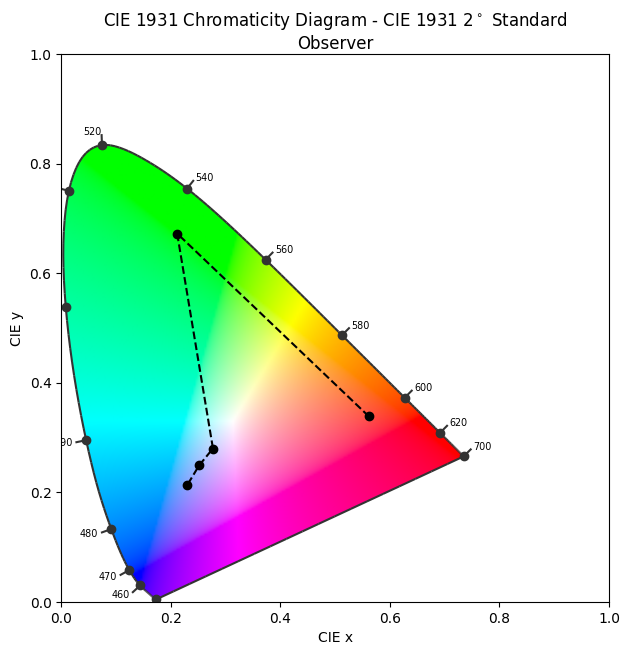

In [ ]:
import colour
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot([x_700, x_600, x_500, x_400, x_300],[y_700, y_600, y_500, y_400, y_300],'ko--')

/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


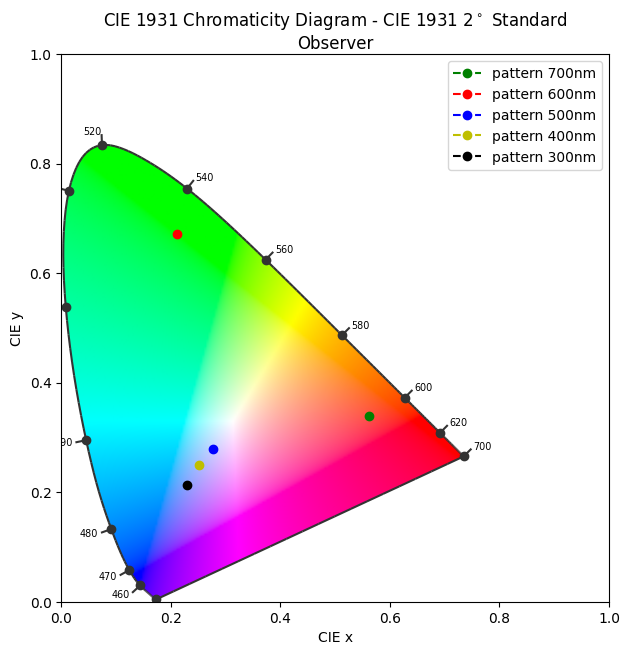

In [ ]:
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(x_700, y_700, 'go--',label='pattern 700nm')
axes.plot(x_600, y_600, 'ro--',label='pattern 600nm')
axes.plot(x_500, y_500, 'bo--',label='pattern 500nm')
axes.plot(x_400, y_400, 'yo--',label='pattern 400nm')
axes.plot(x_300, y_300, 'ko--',label='pattern 300nm')
axes.legend(loc='upper right')

In [ ]:
print(cie.x)

0      0.000130
1      0.000146
2      0.000164
3      0.000184
4      0.000207
         ...   
466    0.000002
467    0.000002
468    0.000001
469    0.000001
470    0.000001
Name: x, Length: 471, dtype: float64
